 Report

1.Read data in and split 30% to validation data
2.RandomForestClassifier,RandomForestRegressor, Ridge
3.It will converge, so it won't overfit
4.Find 3 important feature by Random Forest Tree
5.Split data, train good model and then predict the X_test 

In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')
origin_X_train = X_train
origin_y_train = y_train
X_test = pd.read_csv('./data/nba/X_test.csv')

In [3]:
def pd2np(df):
    return df.as_matrix()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [7]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_valid_pred = forest.predict(X_valid)
# y_test_pred = forest.predict(X_test)
print('MSE train: %.2f, valid: %.2f' %
        (mean_squared_error(y_train, y_train_pred),
         mean_squared_error(y_valid, y_valid_pred)
         ))
print('Accuracy',accuracy_score(y_valid,y_valid_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


MSE train: 0.00, valid: 0.40
Accuracy 0.600318066158


In [8]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_train.columns.values[indices[f]], 
                            importances[indices[f]]))
    
select_feature = X_train.columns[indices[0:3]]

 1) GAME_CLOCK                     0.200453
 2) SHOT_DIST                      0.200179
 3) SHOT_CLOCK                     0.177025
 4) CLOSE_DEF_DIST                 0.173898
 5) TOUCH_TIME                     0.140622
 6) PERIOD                         0.052434
 7) DRIBBLES                       0.048234
 8) PTS_TYPE                       0.007156


In [9]:
X_train_ = X_train[select_feature]
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(X_train_, y_train, test_size=0.3, random_state=0)

In [10]:
forest.fit(X_train_, y_train_)
y_train_pred = forest.predict(X_train_)
y_valid_pred = forest.predict(X_valid_)
# y_test_pred = forest.predict(X_test)
print('MSE train: %.2f, valid: %.2f' %
        (mean_squared_error(y_train_, y_train_pred),
         mean_squared_error(y_valid_, y_valid_pred)
         ))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


MSE train: 0.00, valid: 0.44


In [11]:
from sklearn.ensemble import RandomForestRegressor
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
sc.transform(X_valid)

array([[-1.29304235, -0.41433087, -1.91688144, ...,  1.0927229 ,
         1.6756015 ,  0.96583612],
       [-1.29304235,  0.05850749, -0.29847934, ...,  0.24709654,
        -0.59680061, -0.15329234],
       [-0.41078515, -0.50600362, -0.15282315, ..., -1.20738079,
        -0.59680061, -1.30852171],
       ..., 
       [ 0.47147205,  0.07298213, -0.29847934, ..., -0.89168028,
        -0.59680061, -1.38072355],
       [-0.41078515,  1.01383398, -0.36321542, ..., -0.36175443,
        -0.59680061, -0.73090702],
       [ 2.23598645, -0.55425243, -0.91347214, ...,  0.90104759,
        -0.59680061, -0.15329234]])

In [12]:
regr = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
regr.fit(X_train_std, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [13]:
y_train_pred = regr.predict(X_train_std)
y_valid_pred = regr.predict(X_valid)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_valid, y_valid_pred)))
print('Accuracy',accuracy_score(y_valid,y_valid_pred.round()))

MSE train: 0.03, test: 0.25
Accuracy 0.499872773537


In [14]:
importances = regr.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_train.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) GAME_CLOCK                     0.212391
 2) SHOT_DIST                      0.208255
 3) SHOT_CLOCK                     0.176485
 4) CLOSE_DEF_DIST                 0.162218
 5) TOUCH_TIME                     0.138502
 6) PERIOD                         0.053592
 7) DRIBBLES                       0.045039
 8) PTS_TYPE                       0.003516


In [15]:
sc = StandardScaler()
X_train_std_ = sc.fit_transform(X_train_)

In [16]:
regr = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
regr.fit(X_train_std_, y_train_.as_matrix())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [17]:
y_train_pred = regr.predict(X_train_std_)
y_valid_pred = regr.predict(X_valid_)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train_, y_train_pred),
       mean_squared_error(y_valid_, y_valid_pred)))

print('Accuracy',accuracy_score(y_valid_,y_valid_pred.round()))

MSE train: 0.04, test: 0.25
Accuracy 0.541621228644


In [18]:
def mse(model, X, y):
    return mean_squared_error(y_train_, y_train_pred)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
X_select = origin_X_train[select_feature]
X_select = pd2np(X_select)
sc = StandardScaler()
X_std = sc.fit_transform(X_select)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_std)

print(origin_y_train.shape)
X_select_train , X_valid , y_select_train , y_valid = train_test_split(
    X_poly , origin_y_train.as_matrix() , test_size = 0.3 , random_state = 0)


for a in [0, 1, 10, 100, 1000]:
    lr_rg = Ridge(alpha=a)
    lr_rg.fit(X_select_train, y_select_train)
    
    y_train_pred = lr_rg.predict(X_select_train)
    y_test_pred = lr_rg.predict(X_valid)

    print('\n[Alpha = %.2f]' % a)
    y_train_pred.round()
    print('MSE train: %f, test: %f' %
        (mean_squared_error(y_select_train, y_train_pred),
         mean_squared_error(y_valid, y_test_pred)))
    print('Accuracy',accuracy_score(y_valid,y_test_pred.round()))

lr_rg = Ridge(alpha=1000)
lr_rg.fit(X_select_train, y_select_train)

x_test = X_test[select_feature]
x_test = pd2np(x_test)
x_test_poly = poly.fit_transform(x_test)
y_pred = lr_rg.predict(x_test_poly)
for a in range(y_pred.shape[0]) :
    if y_pred[a] < 0.5:
        y_pred[a] = 0
    else:
        y_pred[a] = 1
np.savetxt('./data/nba/y_pred.csv', y_pred, delimiter=",")

(52399, 1)

[Alpha = 0.00]
MSE train: 0.237138, test: 0.236741
Accuracy 0.603944020356

[Alpha = 1.00]
MSE train: 0.237138, test: 0.236741
Accuracy 0.603944020356

[Alpha = 10.00]
MSE train: 0.237138, test: 0.236741
Accuracy 0.603944020356

[Alpha = 100.00]
MSE train: 0.237138, test: 0.236741
Accuracy 0.604134860051

[Alpha = 1000.00]
MSE train: 0.237147, test: 0.236756
Accuracy 0.604643765903


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


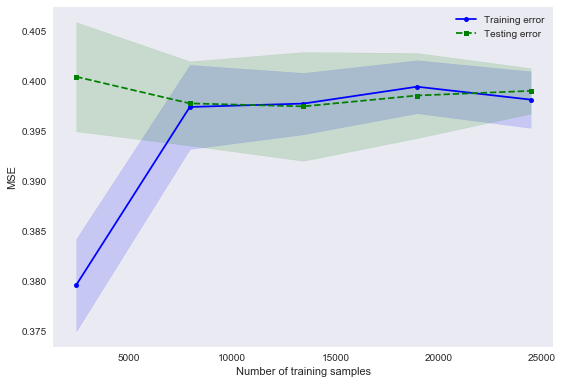

In [20]:
from sklearn.learning_curve import learning_curve

# mse 
def mse(model, X, y):
    t = model.predict(X)
    for a in range(t.shape[0]):
        if t[a] < 0.5:
            t[a] = 0
        else:
            t[a] = 1
    
    return ((t - y)**2).mean()

# learning curve
lr = Ridge(alpha=1000)

train_sizes, train_scores, test_scores = learning_curve(
      estimator=lr, X=X_select_train, y=y_select_train, scoring=mse)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
  train_sizes,
  train_mean,
  color='blue',
  marker='o',
  markersize=5,
  label='Training error')
plt.fill_between(
  train_sizes,
  train_mean + train_std,
  train_mean - train_std,
  alpha=0.15,
  color='blue')

plt.plot(
  train_sizes,
  test_mean,
  color='green',
  linestyle='--',
  marker='s',
  markersize=5,
  label='Testing error')
plt.fill_between(
  train_sizes,
  test_mean + test_std,
  test_mean - test_std,
  alpha=0.15,
  color='green')


plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()